Mean Absolute Error: 1.94
Mean Squared Error: 5.4004992000000005
Root Mean Squared Error: 2.3238974159803183
R²: 0.6787329446757882
Predicción de ventas para el siguiente mes 1: 21.582
Predicción de ventas para el siguiente mes 2: 21.582
Predicción de ventas para el siguiente mes 3: 21.582
Predicción de ventas para el siguiente mes 4: 21.582
Predicción de ventas para el siguiente mes 5: 21.582
Predicción de ventas para el siguiente mes 6: 21.582
Predicción de ventas para el siguiente mes 7: 21.582
Predicción de ventas para el siguiente mes 8: 21.582
Predicción de ventas para el siguiente mes 9: 21.582
Predicción de ventas para el siguiente mes 10: 21.582
Predicción de ventas para el siguiente mes 11: 21.582
Predicción de ventas para el siguiente mes 12: 21.582


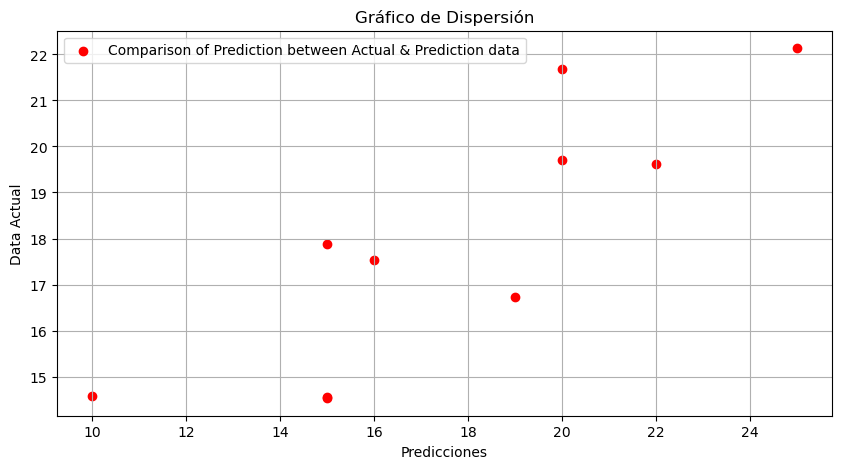

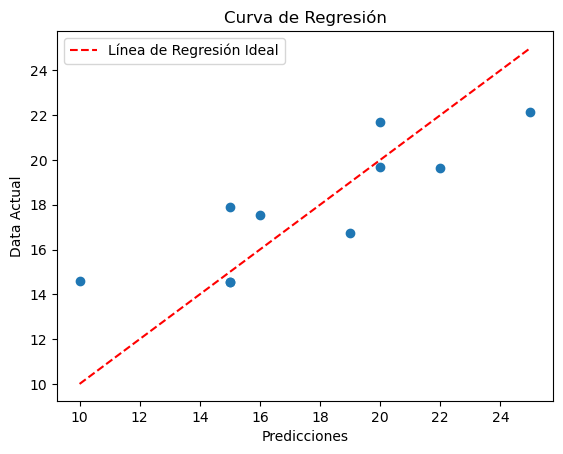

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

df = pd.read_excel("./Data Set - Pruetas-te.xlsx")
#df['Productos Vendidos'] = np.log(df['Productos Vendidos'])
# Codificar la columna "Gastos de Almacenamiento" con LabelEncoder
le = LabelEncoder()
df["Gastos de Almacenamiento"] = le.fit_transform(df["Gastos de Almacenamiento"])

# Codificar la columna "Demanda del Producto" con LabelEncoder
demanda_mapping = {"Alta": 3, "Media": 2, "Baja": 1}
df["Demanda del Producto"] = df["Demanda del Producto"].map(demanda_mapping)

# Codificar la columna "Festividad" con LabelEncoder
df["Festividad"] = le.fit_transform(df["Festividad"])


x = df.drop(["Productos Vendidos"], axis=1)
y = df["Productos Vendidos"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)
model = RandomForestRegressor(random_state=42, n_estimators=500)
regressor = model.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
# Imprimir métricas de rendimiento
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(f"R²: {r2}")
# Supongamos que se desea hacer una predicción para los próximos 12 meses
# Crear un DataFrame con los datos de los próximos 12 meses
nuevo_mes = pd.DataFrame({
    'Mes': range(25, 37),  # Rango de meses del 25 al 36
    'Productos Almacenados': [25] * 12,  # Suponiendo los mismos valores para esta característica
    'Gastos de Marketing': [20] * 12,  # Suponiendo los mismos valores para esta característica
    'Gastos de Almacenamiento': [1] * 12,  # Suponiendo los mismos valores para esta característica
    'Precio de Venta': [1000] * 12,  # Suponiendo los mismos valores para esta característica
    'Demanda del Producto': [10] * 12,  # Suponiendo los mismos valores para esta característica
    'Festividad': [0] * 12  # Suponiendo los mismos valores para esta característica
})

# Realizar las predicciones para los próximos 12 meses
predicciones_nuevas = model.predict(nuevo_mes)

# Imprimir las predicciones para los próximos 12 meses
for i, prediccion in enumerate(predicciones_nuevas):
    print(f"Predicción de ventas para el siguiente mes {i + 1}: {prediccion}")


# Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize = (10, 5))
plt.scatter (y_test, y_pred, color='red', label='Comparison of Prediction between Actual & Prediction data')
plt.legend()
plt.grid()
plt.title('Gráfico de Dispersión')
plt.xlabel('Predicciones')
plt.ylabel('Data Actual')
plt.show()

# Curva de regresión
x_range = np.linspace(min(y_test), max(y_test), 100)
y_range = x_range  # Línea de regresión ideal (y = x)

plt.scatter(y_test, y_pred)
plt.plot(x_range, y_range, color="red", linestyle="--", label="Línea de Regresión Ideal")
plt.xlabel("Predicciones")
plt.ylabel("Data Actual")
plt.title("Curva de Regresión")
plt.legend()
plt.show()
